# 问题2：原材料订购与转运方案优化



## 问题分析

问题2要求解决两个核心问题：
1. 确定企业至少需要选择多少家供应商来满足生产需求
2. 制定未来24周最经济的原材料订购方案和损耗最少的转运方案

## 基础数据回顾

基于第一问的分析，我们已经获得：
- 402家供应商的供货特征量化分析
- 50家最重要供应商的排名
- 各供应商的供货稳定性、可靠性评估
- 转运商的损耗率分析

## 约束条件梳理

### 生产需求约束
- 企业每周产能：2.82万立方米
- 原材料消耗比例：
  - A类：0.6立方米/立方米产品
  - B类：0.66立方米/立方米产品  
  - C类：0.72立方米/立方米产品
- 库存要求：不少于满足两周生产需求的库存量

### 供应商约束
- 供应商实际供货量可能偏离订货量
- 需要基于历史数据预测供货稳定性
- 每家供应商有其供应能力上限

### 转运约束
- 每家转运商运输能力：6000立方米/周
- 转运过程中存在损耗（损耗率varies by转运商）
- 一家供应商每周的原材料尽量由一家转运商运输

### 成本约束
- A类原材料采购单价比C类高20%
- B类原材料采购单价比C类高10%
- 运输和储存的单位费用相同

## 解决思路

### 第一阶段：最少供应商数量确定

#### 方法1：基于需求量的理论计算
1. **计算每周最大原材料需求**
   - 按最高效率（A类原材料）：2.82万 × 0.6 = 1.692万立方米/周
   - 按最低效率（C类原材料）：2.82万 × 0.72 = 2.03万立方米/周

2. **考虑安全库存需求**
   - 两周生产需求作为安全库存
   - 总需求 = 周需求 + 安全库存需求

3. **基于TOP50供应商的供应能力**
   - 从第一问结果中提取TOP50供应商的平均供货能力
   - 按供应能力从高到低排序，累计计算直到满足总需求

#### 方法2：基于历史数据的蒙特卡洛模拟
1. **建立供应商供货概率模型**
   - 基于历史数据建立每个供应商的供货量分布
   - 考虑供货的不确定性和波动性

2. **多次模拟验证**
   - 随机选择不同数量的供应商组合
   - 模拟24周的供货情况
   - 计算满足需求的概率，确定最少供应商数量

### 第二阶段：最经济订购方案制定

#### 目标函数设计
$$\text{最小化总成本} = \text{采购成本} + \text{库存成本} + \text{缺货惩罚成本}$$

其中：
- 采购成本 = Σ(订货量 × 单价 × 材料类型系数)
- 库存成本 = Σ(库存量 × 单位库存费用)
- 缺货惩罚成本 = Σ(缺货量 × 单位缺货惩罚)

#### 决策变量
- $x_{i,t}$：第t周向供应商i的订货量
- $I_{t}$：第t周末的库存量
- $S_{t}$：第t周的缺货量

#### 约束条件
1. **需求满足约束**：$\text{库存} + \text{本周接收量} - \text{本周消耗} \geq 0$

2. **库存平衡约束**：$I_t = I_{t-1} + \text{接收量}_t - \text{需求}_t$

3. **最小库存约束**：$I_t \geq 2 \times \text{周需求}$

4. **供应商产能约束**：$x_{i,t} \leq \text{供应商i的最大供应能力}$

5. **非负约束**：$x_{i,t} \geq 0$

### 第三阶段：损耗最少转运方案

#### 目标函数
$$\text{最小化总损耗} = \sum_{i,j,t} (\text{供货量}_{i,t} \times \text{损耗率}_{j,t} \times y_{i,j,t})$$

#### 决策变量
- $y_{i,j,t}$：第t周供应商i是否由转运商j运输（0-1变量）

#### 约束条件
1. **转运商选择约束**：$\sum_j y_{i,j,t} \leq 1$ （每个供应商每周最多选择一个转运商）

2. **转运能力约束**：$\sum_i (\text{供货量}_{i,t} \times y_{i,j,t}) \leq 6000$ （每个转运商的周运输能力）

3. **逻辑约束**：只有当供应商i在第t周有供货时，才能选择转运商

## 求解策略

### 整体求解框架
1. **两阶段优化方法**
   - 第一阶段：固定供应商选择，优化订购量
   - 第二阶段：基于订购方案，优化转运分配

2. **启发式算法**
   - 贪心算法：优先选择性价比高的供应商和转运商
   - 遗传算法：用于供应商组合优化
   - 动态规划：用于时间序列的订购量优化

### 模型验证
1. **历史数据回测**：用前期数据验证模型的有效性
2. **敏感性分析**：分析关键参数变化对结果的影响
3. **鲁棒性测试**：测试方案在不确定环境下的表现

## 预期分析内容

### 订购方案分析
1. **供应商选择结果**：最终选择的供应商数量和名单
2. **订购量分布**：各周、各供应商的具体订购量
3. **成本分析**：总成本构成和每周成本变化
4. **风险评估**：供货风险和库存风险分析

### 转运方案分析
1. **转运商利用率**：各转运商的使用频率和运输量
2. **损耗分析**：总损耗量和损耗率统计
3. **运输效率**：运输能力利用率分析

### 实施效果评估
1. **需求满足率**：各周需求满足程度
2. **库存水平**：库存量变化趋势和安全性
3. **经济效益**：成本节约和效率提升
4. **风险控制**：供应风险的有效控制程度

## 技术实施方案

### 数据预处理
1. **利用第一问的分析结果**
   - 导入供应商可靠性评估数据
   - 导入转运商损耗率分析数据
   - 导入TOP50重要供应商名单

2. **建立基础数据结构**
   - 供应商基本信息（名称、类型、历史供货数据）
   - 转运商基本信息（名称、历史损耗率数据）
   - 生产需求参数（产能、原材料消耗比例、成本系数）

### 核心算法设计

#### 算法1：最少供应商数量确定
```
输入：TOP50供应商数据、生产需求、安全库存要求
输出：最少供应商数量N

步骤：
1. 按供应商重要性排序（来自第一问结果）
2. 计算累计供应能力
3. 考虑供货不确定性，添加安全边际
4. 返回满足需求的最少供应商数量
```

#### 算法2：订购方案优化
```
输入：选定供应商集合、24周需求预测、成本参数
输出：最优订购计划矩阵

方法：多目标线性规划
- 目标1：最小化总成本
- 目标2：最大化供应稳定性
- 约束：需求满足、库存要求、供应能力限制
```

#### 算法3：转运方案优化
```
输入：订购方案、转运商损耗数据、运输能力
输出：最优转运分配方案

方法：匈牙利算法 + 启发式优化
- 构建成本矩阵（基于损耗率）
- 考虑运输能力约束
- 优化供应商-转运商匹配
```

### 关键技术点

#### 1. 不确定性处理
- **供货量预测**：基于历史数据的时间序列分析
- **需求波动**：考虑生产计划的不确定性
- **应急预案**：设计供应商备选方案

#### 2. 多目标优化
- **成本与风险平衡**：帕累托前沿分析
- **权重设定**：基于企业决策偏好
- **方案比较**：多准则决策分析（MCDM）

#### 3. 滚动优化策略
- **周期性重新规划**：每4周更新一次方案
- **反馈机制**：根据实际执行情况调整参数
- **学习能力**：历史数据不断更新模型参数

## 代码实现框架

### 主要模块划分
1. **数据加载模块**：`data_loader.py`
2. **需求预测模块**：`demand_forecast.py`  
3. **供应商选择模块**：`supplier_selection.py`
4. **订购优化模块**：`order_optimization.py`
5. **转运优化模块**：`transport_optimization.py`
6. **结果分析模块**：`result_analysis.py`
7. **可视化模块**：`visualization.py`

### 优化求解工具
- **线性规划**：PuLP库或Gurobi
- **整数规划**：用于0-1决策变量
- **启发式算法**：遗传算法（DEAP库）
- **统计分析**：SciPy、Statsmodels

### 输出结果格式
1. **订购方案表**：供应商 × 周次 矩阵
2. **转运方案表**：供应商-转运商分配表
3. **成本分析报告**：各项成本明细和趋势
4. **风险评估报告**：供应风险和应对措施
5. **可视化图表**：成本趋势、库存变化、供应商分布等

## 评估指标体系

### 经济性指标
- **总成本**：采购成本 + 运输成本 + 库存成本
- **单位成本**：每立方米产品的原材料成本
- **成本波动性**：成本标准差和变异系数

### 稳定性指标  
- **需求满足率**：实际满足需求/计划需求
- **库存充足率**：满足安全库存要求的周数比例
- **供应商集中度**：基尼系数或HHI指数

### 效率性指标
- **损耗率**：总损耗量/总供货量
- **运输利用率**：实际运输量/运输能力
- **库存周转率**：年消耗量/平均库存量

### 风险性指标
- **供应中断风险**：供应商失效概率
- **价格波动风险**：成本变异系数
- **需求冲击风险**：极端情况下的应对能力

## 具体实施步骤

### Step 1: 数据整合与预处理
```python
# 伪代码示例
def load_problem1_results():
    """加载第一问的分析结果"""
    top50_suppliers = pd.read_excel('TOP50最重要供应商.xlsx')
    reliability_data = pd.read_excel('供应商可靠性评估.xlsx') 
    transporter_analysis = pd.read_excel('转运商分析结果.xlsx')
    return top50_suppliers, reliability_data, transporter_analysis

def calculate_demand_parameters():
    """计算生产需求参数"""
    weekly_production = 28200  # 立方米/周
    material_ratios = {'A': 0.6, 'B': 0.66, 'C': 0.72}
    price_multipliers = {'A': 1.2, 'B': 1.1, 'C': 1.0}
    safety_stock_weeks = 2
    return weekly_production, material_ratios, price_multipliers, safety_stock_weeks
```

### Step 2: 最少供应商数量确定
```python
# 伪代码示例
def determine_minimum_suppliers(suppliers_data, demand_params):
    """确定最少供应商数量"""
    # 方法1: 确定性分析
    min_suppliers_deterministic = calculate_deterministic_minimum()
    
    # 方法2: 随机性分析（考虑供货不确定性）
    min_suppliers_stochastic = monte_carlo_simulation()
    
    # 方法3: 风险调整分析  
    min_suppliers_risk_adjusted = risk_adjusted_calculation()
    
    return max(min_suppliers_deterministic, min_suppliers_stochastic, min_suppliers_risk_adjusted)
```

### Step 3: 订购方案优化建模
```python
# 伪代码示例
def optimize_ordering_plan(selected_suppliers, weeks=24):
    """优化订购方案"""
    model = pulp.LpProblem("Material_Ordering", pulp.LpMinimize)
    
    # 决策变量：x[i][t] = 第t周向供应商i的订货量
    x = {}
    for supplier in selected_suppliers:
        for week in range(1, weeks+1):
            x[supplier, week] = pulp.LpVariable(f"Order_{supplier}_{week}", lowBound=0)
    
    # 目标函数：最小化总成本
    total_cost = calculate_total_cost_expression(x)
    model += total_cost
    
    # 约束条件
    add_demand_constraints(model, x)
    add_inventory_constraints(model, x)
    add_capacity_constraints(model, x)
    
    # 求解
    model.solve()
    return extract_solution(x)
```

### Step 4: 转运方案优化
```python
# 伪代码示例  
def optimize_transport_plan(ordering_plan, transporters_data):
    """优化转运方案"""
    transport_model = pulp.LpProblem("Transport_Assignment", pulp.LpMinimize)
    
    # 决策变量：y[i][j][t] = 第t周供应商i是否由转运商j运输
    y = {}
    for supplier in suppliers:
        for transporter in transporters:
            for week in range(1, 25):
                y[supplier, transporter, week] = pulp.LpVariable(
                    f"Transport_{supplier}_{transporter}_{week}", cat='Binary')
    
    # 目标函数：最小化总损耗
    total_loss = calculate_total_loss_expression(y)
    transport_model += total_loss
    
    # 约束条件
    add_assignment_constraints(transport_model, y)  # 每个供应商每周最多一个转运商
    add_capacity_constraints(transport_model, y)    # 转运商能力限制
    
    # 求解
    transport_model.solve()
    return extract_transport_solution(y)
```

### Step 5: 结果分析与验证
```python
# 伪代码示例
def analyze_solution_performance(ordering_plan, transport_plan):
    """分析方案性能"""
    # 经济性分析
    total_cost_analysis = calculate_cost_breakdown(ordering_plan)
    cost_comparison = compare_with_baseline(total_cost_analysis)
    
    # 稳定性分析  
    demand_satisfaction = simulate_demand_satisfaction(ordering_plan)
    inventory_analysis = analyze_inventory_levels(ordering_plan)
    
    # 风险分析
    supply_risk_assessment = assess_supply_risks(ordering_plan)
    sensitivity_analysis = perform_sensitivity_analysis()
    
    return {
        'cost_analysis': total_cost_analysis,
        'performance_metrics': demand_satisfaction,
        'risk_assessment': supply_risk_assessment
    }
```

## 预期结果与输出

### 1. 核心数值结果
- **最少供应商数量**：基于计算得出的具体数值（例如：35家）
- **24周订购计划表**：详细的订购量分配矩阵
- **转运分配方案**：供应商与转运商的最优匹配

### 2. 经济效益分析
- **总成本预估**：24周期间的总采购和运输成本
- **成本结构分析**：
  - 原材料采购成本占比
  - 运输成本占比  
  - 库存持有成本占比
- **与基准方案对比**：成本节约额度和节约率

### 3. 方案可行性验证
- **需求满足率**：≥ 95%（目标值）
- **库存安全性**：安全库存达成率 ≥ 90%
- **供应商利用率**：各供应商的使用频率分布
- **转运商负荷率**：运输能力利用效率

### 4. 风险控制效果
- **供应集中度**：避免过度依赖少数供应商
- **应急响应能力**：关键供应商断供时的应对方案
- **成本波动控制**：成本变异系数控制在合理范围

### 5. 可视化展示
- **订购量时间序列图**：展示24周的订购量变化趋势
- **供应商贡献度饼图**：各供应商供货量占比
- **转运商使用热力图**：转运商在不同时间的使用频率
- **成本构成堆积图**：各项成本的时间变化

### 6. 敏感性分析结果
- **需求变化影响**：±10%需求变化对方案的影响
- **供应商产能变化**：关键供应商产能下降的应对
- **转运成本变化**：运输费用波动的影响分析


## 代码实现：最少供应商数量的蒙特卡洛模拟

下面实现具体的蒙特卡洛模拟代码来确定最少供应商数量：

In [29]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
# 设置中文字体和图表样式
plt.rcParams['font.sans-serif'] = ['SimHei', '黑体', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False


print("库导入完成，开始加载第一问的分析结果...")

库导入完成，开始加载第一问的分析结果...


In [30]:
# 加载第一问的分析结果
def load_problem1_results():
    """加载第一问的分析结果 - 基于新的数据结构"""
    try:
        # 1. 加载供应商可靠性年度加权排名（主要结果文件）
        supplier_ranking = pd.read_excel('DataFrames/供应商可靠性年度加权排名.xlsx')
        print(f"✓ 供应商排名数据加载完成: {len(supplier_ranking)} 条记录")
        
        # 2. 加载供应商基本特征分析
        supplier_features = pd.read_excel('DataFrames/供应商基本特征分析.xlsx')
        print(f"✓ 供应商基本特征数据加载完成: {len(supplier_features)} 条记录")
        
        # 3. 加载供应商可靠性综合评估
        reliability_assessment = pd.read_excel('DataFrames/供应商可靠性综合评估.xlsx')
        print(f"✓ 供应商可靠性评估数据加载完成: {len(reliability_assessment)} 条记录")
        
        # 4. 加载供应商供货率分析
        supply_rate_analysis = pd.read_excel('DataFrames/供应商供货率分析.xlsx')
        print(f"✓ 供应商供货率分析数据加载完成: {len(supply_rate_analysis)} 条记录")
        
        # 5. 加载原始供应商数据（用于详细分析）
        supplier_order = pd.read_excel('C/附件1 近5年402家供应商的相关数据.xlsx', sheet_name='企业的订货量（m³）')
        supplier_supply = pd.read_excel('C/附件1 近5年402家供应商的相关数据.xlsx', sheet_name='供应商的供货量（m³）')
        print(f"✓ 原始供应商数据加载完成")
        
        # 6. 加载转运商数据
        transporter_data = pd.read_excel('C/附件2 近5年8家转运商的相关数据.xlsx')
        print(f"✓ 转运商数据加载完成: {len(transporter_data)} 条记录")
        
        print("=" * 50)
        print("数据加载总览:")
        print(f"  供应商排名文件: {supplier_ranking.shape}")
        print(f"  供应商特征文件: {supplier_features.shape}")
        print(f"  可靠性评估文件: {reliability_assessment.shape}")
        print(f"  供货率分析文件: {supply_rate_analysis.shape}")
        print(f"  原始订货数据: {supplier_order.shape}")
        print(f"  原始供货数据: {supplier_supply.shape}")
        print(f"  转运商数据: {transporter_data.shape}")
        
        return {
            'supplier_ranking': supplier_ranking,
            'supplier_features': supplier_features,
            'reliability_assessment': reliability_assessment,
            'supply_rate_analysis': supply_rate_analysis,
            'supplier_order': supplier_order,
            'supplier_supply': supplier_supply,
            'transporter_data': transporter_data
        }
    
    except Exception as e:
        print(f"数据加载出错: {e}")
        return None

# 设置生产需求参数
def set_production_parameters():
    """设置生产需求参数"""
    params = {
        'weekly_production': 28200,  # 立方米/周
        'material_ratios': {'A': 0.6, 'B': 0.66, 'C': 0.72},  # 每立方米产品需要的原材料
        'price_multipliers': {'A': 1.2, 'B': 1.1, 'C': 1.0},  # 相对C类的价格倍数
        'safety_stock_weeks': 2,  # 安全库存周数
        'planning_weeks': 24  # 规划周数
    }
    
    print("生产参数设置:")
    print(f"  每周产能: {params['weekly_production']:,} 立方米")
    print(f"  安全库存要求: {params['safety_stock_weeks']} 周")
    print(f"  规划期长度: {params['planning_weeks']} 周")
    print(f"  材料消耗比例: A类{params['material_ratios']['A']}, B类{params['material_ratios']['B']}, C类{params['material_ratios']['C']}")
    
    return params

# 执行数据加载
print("开始加载第一问的分析结果...")
problem1_data = load_problem1_results()
production_params = set_production_parameters()

开始加载第一问的分析结果...
✓ 供应商排名数据加载完成: 50 条记录
✓ 供应商基本特征数据加载完成: 402 条记录
✓ 供应商可靠性评估数据加载完成: 402 条记录
✓ 供应商供货率分析数据加载完成: 402 条记录
✓ 原始供应商数据加载完成
✓ 转运商数据加载完成: 8 条记录
数据加载总览:
  供应商排名文件: (50, 19)
  供应商特征文件: (402, 10)
  可靠性评估文件: (402, 24)
  供货率分析文件: (402, 7)
  原始订货数据: (402, 242)
  原始供货数据: (402, 242)
  转运商数据: (8, 241)
生产参数设置:
  每周产能: 28,200 立方米
  安全库存要求: 2 周
  规划期长度: 24 周
  材料消耗比例: A类0.6, B类0.66, C类0.72
✓ 原始供应商数据加载完成
✓ 转运商数据加载完成: 8 条记录
数据加载总览:
  供应商排名文件: (50, 19)
  供应商特征文件: (402, 10)
  可靠性评估文件: (402, 24)
  供货率分析文件: (402, 7)
  原始订货数据: (402, 242)
  原始供货数据: (402, 242)
  转运商数据: (8, 241)
生产参数设置:
  每周产能: 28,200 立方米
  安全库存要求: 2 周
  规划期长度: 24 周
  材料消耗比例: A类0.6, B类0.66, C类0.72


In [31]:
# 分析供应商历史供货特征
def analyze_supplier_characteristics(problem1_data):
    """分析供应商的历史供货特征，结合第一问的分析结果"""
    
    if problem1_data is None:
        print("第一问数据未加载成功")
        return None
    
    # 获取原始供货数据
    supplier_supply = problem1_data['supplier_supply']
    supplier_ranking = problem1_data['supplier_ranking']
    supplier_features = problem1_data['supplier_features']
    
    # 获取供应商基本信息
    suppliers_info = supplier_supply.iloc[:, :2].copy()
    suppliers_info.columns = ['供应商名称', '材料类型']
    
    # 获取供货量数据（从第3列开始的240周数据）
    supply_data = supplier_supply.iloc[:, 2:].values
    
    # 计算每个供应商的统计特征
    supplier_stats = []
    
    for i, (name, material_type) in enumerate(suppliers_info.values):
        weekly_supply = supply_data[i]
        
        # 过滤掉0值，只分析实际供货的周次
        non_zero_supply = weekly_supply[weekly_supply > 0]
        
        # 从第一问结果中获取相关指标
        ranking_info = supplier_ranking[supplier_ranking['供应商名称'] == name]
        feature_info = supplier_features[supplier_features['supplier_name'] == name]
        
        if len(non_zero_supply) > 0:
            # 基础统计指标
            avg_supply = np.mean(non_zero_supply)
            std_supply = np.std(non_zero_supply)
            supply_frequency = len(non_zero_supply) / len(weekly_supply)
            
            # 从第一问结果中提取高级指标
            if len(ranking_info) > 0:
                ranking_score = ranking_info.iloc[0].get('加权可靠性得分', 0)
                reliability_score = ranking_info.iloc[0].get('总体可靠性得分', 0)
                market_share = ranking_info.iloc[0].get('市场占有率得分', 0) / 100  # 转换为比例
                stability_score = ranking_info.iloc[0].get('供货稳定性得分', 0) / 100  # 转换为比例
            else:
                ranking_score = 0
                reliability_score = 0
                market_share = 0
                stability_score = 1 - (std_supply / avg_supply) if avg_supply > 0 else 0
            
            # 从基本特征中获取补充信息
            if len(feature_info) > 0:
                # 使用基本特征中的信息作为补充
                feature_reliability = feature_info.iloc[0].get('reliability', reliability_score)
                feature_stability = feature_info.iloc[0].get('stability', stability_score)
                # 如果排名文件中没有信息，使用特征文件的信息
                if reliability_score == 0:
                    reliability_score = feature_reliability
                if stability_score == 0:
                    stability_score = feature_stability
            
            stats_dict = {
                '供应商名称': name,
                '材料类型': material_type,
                '平均供货量': avg_supply,
                '供货量标准差': std_supply,
                '最大供货量': np.max(non_zero_supply),
                '最小供货量': np.min(non_zero_supply),
                '供货频率': supply_frequency,
                '供货稳定性': stability_score,
                '可靠性分数': reliability_score,
                '综合排名分数': ranking_score,
                '市场占有率': market_share,
                '供货能力评分': avg_supply * supply_frequency * (1 + reliability_score)
            }
        else:
            stats_dict = {
                '供应商名称': name,
                '材料类型': material_type,
                '平均供货量': 0,
                '供货量标准差': 0,
                '最大供货量': 0,
                '最小供货量': 0,
                '供货频率': 0,
                '供货稳定性': 0,
                '可靠性分数': 0,
                '综合排名分数': 0,
                '市场占有率': 0,
                '供货能力评分': 0
            }
        
        supplier_stats.append(stats_dict)
    
    df_stats = pd.DataFrame(supplier_stats)
    
    print(f"供应商历史供货特征分析完成:")
    print(f"  总供应商数量: {len(df_stats)}")
    print(f"  有效供应商数量: {len(df_stats[df_stats['平均供货量'] > 0])}")
    print(f"  A类材料供应商: {len(df_stats[df_stats['材料类型'] == 'A'])}")
    print(f"  B类材料供应商: {len(df_stats[df_stats['材料类型'] == 'B'])}")
    print(f"  C类材料供应商: {len(df_stats[df_stats['材料类型'] == 'C'])}")
    
    # 显示TOP10供应商
    top_suppliers = df_stats.nlargest(10, '综合排名分数')
    print(f"\nTOP10供应商（按第一问综合排名）:")
    for idx, supplier in top_suppliers.iterrows():
        print(f"  {supplier['供应商名称'][:10]:<10} | {supplier['材料类型']} | "
              f"排名分数: {supplier['综合排名分数']:.3f} | "
              f"平均供货: {supplier['平均供货量']:.0f}")
    
    return df_stats

# 执行供应商特征分析
if problem1_data is not None:
    supplier_characteristics = analyze_supplier_characteristics(problem1_data)
else:
    print("无法进行供应商特征分析，数据加载失败")

供应商历史供货特征分析完成:
  总供应商数量: 402
  有效供应商数量: 402
  A类材料供应商: 146
  B类材料供应商: 134
  C类材料供应商: 122

TOP10供应商（按第一问综合排名）:
  S229       | A | 排名分数: 35.049 | 平均供货: 1479
  S361       | C | 排名分数: 34.546 | 平均供货: 1367
  S108       | B | 排名分数: 33.220 | 平均供货: 1004
  S340       | B | 排名分数: 31.699 | 平均供货: 714
  S151       | C | 排名分数: 31.184 | 平均供货: 810
  S308       | B | 排名分数: 30.926 | 平均供货: 571
  S140       | B | 排名分数: 30.896 | 平均供货: 1379
  S282       | A | 排名分数: 30.829 | 平均供货: 706
  S131       | B | 排名分数: 30.782 | 平均供货: 573
  S275       | A | 排名分数: 30.698 | 平均供货: 661


In [32]:
# 筛选和排序供应商（放宽条件以包含更多供应商）
def prepare_suppliers_for_simulation(supplier_characteristics, problem1_data):
    """为蒙特卡洛模拟准备供应商数据，放宽筛选条件"""
    
    if supplier_characteristics is None or problem1_data is None:
        return None, None
    
    # 放宽筛选条件，包含更多有效供应商
    valid_suppliers = supplier_characteristics[
        (supplier_characteristics['平均供货量'] > 5) &  # 降低最小供货量要求
        (supplier_characteristics['供货频率'] > 0.001) &  # 降低供货频率要求
        (supplier_characteristics['综合排名分数'] >= 0)  # 包含所有有排名的供应商
    ].copy()
    
    print(f"放宽筛选条件后的供应商数量:")
    print(f"  筛选前总数: {len(supplier_characteristics)}")
    print(f"  筛选后总数: {len(valid_suppliers)}")
    
    # 按第一问的综合排名分数排序
    valid_suppliers = valid_suppliers.sort_values('综合排名分数', ascending=False)
    
    # 计算综合风险调整因子
    valid_suppliers['风险调整因子'] = (
        valid_suppliers['供货稳定性'] * 0.3 + 
        valid_suppliers['供货频率'] * 0.25 +
        (valid_suppliers['可靠性分数'] / 100) * 0.25 +  # 归一化可靠性分数
        (valid_suppliers['市场占有率'] / max(valid_suppliers['市场占有率'].max(), 1)) * 0.2
    )
    
    # 重新计算供货能力评分
    max_capability = valid_suppliers['供货能力评分'].max()
    if max_capability > 0:
        valid_suppliers['最终评分'] = (
            (valid_suppliers['综合排名分数'] / valid_suppliers['综合排名分数'].max()) * 0.4 +
            (valid_suppliers['供货能力评分'] / max_capability) * 0.6
        )
    else:
        valid_suppliers['最终评分'] = valid_suppliers['综合排名分数'] / valid_suppliers['综合排名分数'].max()
    
    # 按最终评分重新排序
    valid_suppliers = valid_suppliers.sort_values('最终评分', ascending=False)
    
    # 按材料类型分组
    suppliers_by_type = {}
    total_supply_capacity = {}
    
    for material_type in ['A', 'B', 'C']:
        suppliers_by_type[material_type] = valid_suppliers[
            valid_suppliers['材料类型'] == material_type
        ].copy()
        
        # 计算该类型供应商的总供货能力
        type_suppliers = suppliers_by_type[material_type]
        total_capacity = sum(s['平均供货量'] * 24 * s['供货频率'] for _, s in type_suppliers.iterrows())
        total_supply_capacity[material_type] = total_capacity
    
    print("基于第一问结果的供应商筛选（放宽条件）:")
    for material_type, df in suppliers_by_type.items():
        print(f"  {material_type}类有效供应商: {len(df)}家")
        if len(df) > 0:
            print(f"    平均供货能力: {df['平均供货量'].mean():.0f} 立方米")
            print(f"    最大供货能力: {df['平均供货量'].max():.0f} 立方米")
            print(f"    平均综合排名分数: {df['综合排名分数'].mean():.3f}")
            print(f"    总理论供货能力(24周): {total_supply_capacity[material_type]:,.0f} 立方米")
            
            # 显示该类型TOP5供应商
            top5 = df.head(5)
            print(f"    TOP5供应商:")
            for idx, supplier in top5.iterrows():
                weekly_cap = supplier['平均供货量']
                freq = supplier['供货频率']
                capacity_24w = weekly_cap * 24 * freq
                print(f"      {supplier['供应商名称'][:8]:<8} | 排名: {supplier['综合排名分数']:.3f} | "
                      f"周供货: {weekly_cap:.0f} | 24周: {capacity_24w:,.0f}")
    
    return valid_suppliers, suppliers_by_type
def calculate_demand_requirements(production_params):
    """计算每种材料的需求量和安全库存"""
    
    weekly_production = production_params['weekly_production']
    material_ratios = production_params['material_ratios']
    safety_weeks = production_params['safety_stock_weeks']
    planning_weeks = production_params['planning_weeks']
    
    demand_requirements = {}
    
    for material_type, ratio in material_ratios.items():
        weekly_demand = weekly_production * ratio
        safety_stock = weekly_demand * safety_weeks
        total_demand_per_week = weekly_demand + safety_stock / planning_weeks
        
        demand_requirements[material_type] = {
            '每周需求量': weekly_demand,
            '安全库存': safety_stock,
            '24周总需求': weekly_demand * planning_weeks,
            '每周总需求量': total_demand_per_week
        }
    
    print("材料需求量计算完成:")
    for material, req in demand_requirements.items():
        print(f"  {material} - 每周需求: {req['每周需求量']:.0f}, 安全库存: {req['安全库存']:.0f}, 24周总需求: {req['24周总需求']:.0f}, 每周总需求量: {req['每周总需求量']:.0f}")
    
    return demand_requirements
# 重新计算需求和供应商准备
print("重新计算需求和准备供应商数据...")

demand_requirements = calculate_demand_requirements(production_params)

if supplier_characteristics is not None and problem1_data is not None:
    valid_suppliers, suppliers_by_type = prepare_suppliers_for_simulation(
        supplier_characteristics, problem1_data)
else:
    print("无法准备供应商数据，前置分析失败")
    valid_suppliers, suppliers_by_type = None, None

重新计算需求和准备供应商数据...
材料需求量计算完成:
  A - 每周需求: 16920, 安全库存: 33840, 24周总需求: 406080, 每周总需求量: 18330
  B - 每周需求: 18612, 安全库存: 37224, 24周总需求: 446688, 每周总需求量: 20163
  C - 每周需求: 20304, 安全库存: 40608, 24周总需求: 487296, 每周总需求量: 21996
放宽筛选条件后的供应商数量:
  筛选前总数: 402
  筛选后总数: 120
基于第一问结果的供应商筛选（放宽条件）:
  A类有效供应商: 47家
    平均供货能力: 215 立方米
    最大供货能力: 2928 立方米
    平均综合排名分数: 8.464
    总理论供货能力(24周): 144,346 立方米
    TOP5供应商:
      S229     | 排名: 35.049 | 周供货: 1479 | 24周: 35,489
      S282     | 排名: 30.829 | 周供货: 706 | 24周: 16,934
      S275     | 排名: 30.698 | 周供货: 661 | 24周: 15,855
      S329     | 排名: 30.619 | 周供货: 652 | 24周: 15,652
      S352     | 排名: 29.213 | 周供货: 371 | 24周: 8,903
  B类有效供应商: 35家
    平均供货能力: 189 立方米
    最大供货能力: 1379 立方米
    平均综合排名分数: 11.687
    总理论供货能力(24周): 148,489 立方米
    TOP5供应商:
      S140     | 排名: 30.896 | 周供货: 1379 | 24周: 30,205
      S108     | 排名: 33.220 | 周供货: 1004 | 24周: 24,095
      S340     | 排名: 31.699 | 周供货: 714 | 24周: 17,143
      S308     | 排名: 30.926 | 周供货: 571 | 24周: 13,700
     

In [33]:
# 蒙特卡洛模拟核心函数（基于第一问的排名结果）- 修复版本
def monte_carlo_supplier_simulation(suppliers_by_type, demand_requirements, 
                                   n_simulations=1000, confidence_level=0.95):
    """
    使用蒙特卡洛方法确定最少供应商数量（基于第一问的综合评估）
    修复了供货能力计算的逻辑错误
    """
    
    if suppliers_by_type is None:
        print("供应商数据未准备完成，无法进行蒙特卡洛模拟")
        return None
    
    results = {}
    
    for material_type in ['A', 'B', 'C']:
        print(f"\n=== {material_type}类材料蒙特卡洛模拟 ===")
        
        suppliers = suppliers_by_type[material_type]
        if len(suppliers) == 0:
            print(f"警告: 没有{material_type}类材料的有效供应商")
            continue
            
        demand = demand_requirements[material_type]['24周总需求']
        print(f"目标需求: {demand:,.0f} 立方米")
        print(f"可选供应商数量: {len(suppliers)}")
        
        # 先进行理论计算，估算大概需要多少供应商
        total_theoretical_supply = 0
        print(f"\n理论供货能力分析:")
        for idx, supplier in suppliers.head(10).iterrows():
            weekly_supply = supplier['平均供货量']
            supply_freq = supplier['供货频率']
            theoretical_24weeks = weekly_supply * 24 * supply_freq
            total_theoretical_supply += theoretical_24weeks
            print(f"  {supplier['供应商名称']}: {weekly_supply:.0f}/周 × 24周 × {supply_freq:.2f} = {theoretical_24weeks:,.0f}立方米")
            
            if total_theoretical_supply >= demand:
                estimated_min = idx + 1
                print(f"  -> 理论上前{estimated_min}家供应商可能满足需求")
                break
        else:
            estimated_min = len(suppliers)
            print(f"  -> 可能需要所有{len(suppliers)}家供应商")
        
        # 测试不同的供应商数量
        max_suppliers = min(len(suppliers), 30)  # 最多测试30家供应商
        success_rates = []
        min_suppliers = max_suppliers  # 初始化为最大值
        
        # 从理论最小值开始测试
        start_test = max(1, estimated_min - 2)
        
        for n_suppliers in range(start_test, max_suppliers + 1):
            selected_suppliers = suppliers.head(n_suppliers)
            success_count = 0
            
            # 进行蒙特卡洛模拟
            for sim in range(n_simulations):
                total_supply = 0
                
                for idx, supplier in selected_suppliers.iterrows():
                    # 基于历史数据建立供货量分布
                    mean_supply = supplier['平均供货量']
                    std_supply = supplier['供货量标准差']
                    supply_frequency = supplier['供货频率']
                    reliability_score = supplier['可靠性分数']
                    
                    # 可靠性调整因子（0-100分转换为1.0-1.1倍）
                    reliability_factor = 1.0 + (reliability_score / 100) * 0.1
                    
                    # 计算24周总供货量
                    for week in range(24):
                        # 每周判断是否供货
                        if np.random.random() < supply_frequency:
                            # 如果供货，模拟供货量
                            if std_supply > 0 and mean_supply > 0:
                                cv = min(std_supply / mean_supply, 0.3)  # 限制变异系数
                                weekly_supply = np.random.normal(mean_supply, mean_supply * cv)
                                weekly_supply = max(0, weekly_supply)  # 确保非负
                            else:
                                weekly_supply = mean_supply
                            
                            # 应用可靠性调整
                            weekly_supply *= reliability_factor
                            total_supply += weekly_supply
                
                # 检查是否满足需求
                if total_supply >= demand:
                    success_count += 1
            
            success_rate = success_count / n_simulations
            # 补充前面未测试的成功率（设为0）
            while len(success_rates) < n_suppliers - 1:
                success_rates.append(0.0)
            success_rates.append(success_rate)
            
            # 如果成功率达到置信水平，记录最少供应商数量
            if success_rate >= confidence_level and n_suppliers < min_suppliers:
                min_suppliers = n_suppliers
            
            # 输出进度
            if n_suppliers <= 10 or n_suppliers % 3 == 0:
                supplier_names = selected_suppliers['供应商名称'].head(3).tolist()
                name_display = ', '.join([name[:6] for name in supplier_names])
                if len(selected_suppliers) > 3:
                    name_display += "..."
                print(f"  {n_suppliers:2d}家供应商 [{name_display}]: 成功率 {success_rate:.1%}")
            
            # 如果成功率达到要求，可以提前结束
            if success_rate >= confidence_level:
                break
        
        # 如果没有找到满足置信水平的组合，选择成功率最高的
        if min_suppliers == max_suppliers and len(success_rates) > 0:
            best_rate_idx = np.argmax(success_rates)
            min_suppliers = best_rate_idx + start_test
            final_success_rate = success_rates[best_rate_idx]
        elif min_suppliers <= len(success_rates):
            final_success_rate = success_rates[min_suppliers - start_test]
        else:
            final_success_rate = success_rates[-1] if success_rates else 0
        
        # 记录结果
        results[material_type] = {
            '最少供应商数量': min_suppliers,
            '最终成功率': final_success_rate,
            '成功率序列': success_rates,
            '总需求': demand,
            '可选供应商总数': len(suppliers),
            '选定供应商列表': suppliers.head(min_suppliers)[['供应商名称', '综合排名分数', '平均供货量', '可靠性分数']].to_dict('records')
        }
        
        print(f"\n结果: {material_type}类材料至少需要 {min_suppliers} 家供应商")
        print(f"对应成功率: {final_success_rate:.1%}")
        
        # 显示选定的供应商和理论供货能力
        selected_list = suppliers.head(min_suppliers)
        total_theoretical = sum(s['平均供货量'] * 24 * s['供货频率'] for _, s in selected_list.iterrows())
        print(f"选定供应商理论总供货能力: {total_theoretical:,.0f} 立方米 (vs 需求 {demand:,.0f})")
        print(f"理论覆盖率: {total_theoretical/demand:.1%}")
        
        print(f"选定供应商TOP5:")
        for idx, supplier in selected_list.head(5).iterrows():
            weekly_cap = supplier['平均供货量']
            freq = supplier['供货频率']
            capacity_24w = weekly_cap * 24 * freq
            print(f"  {supplier['供应商名称'][:10]:<10} | 排名分数: {supplier['综合排名分数']:.3f} | "
                  f"周供货: {weekly_cap:.0f} | 频率: {freq:.2f} | 24周: {capacity_24w:,.0f}")
    
    return results

# 执行蒙特卡洛模拟
if suppliers_by_type is not None and demand_requirements is not None:
    print("开始修复版蒙特卡洛模拟分析（基于第一问的供应商评估结果）...")
    print("模拟参数: 1000次模拟, 95%置信水平")
    
    mc_results = monte_carlo_supplier_simulation(
        suppliers_by_type, 
        demand_requirements, 
        n_simulations=1000, 
        confidence_level=0.95
    )
else:
    print("无法执行蒙特卡洛模拟，数据准备未完成")
    mc_results = None

开始修复版蒙特卡洛模拟分析（基于第一问的供应商评估结果）...
模拟参数: 1000次模拟, 95%置信水平

=== A类材料蒙特卡洛模拟 ===
目标需求: 406,080 立方米
可选供应商数量: 47

理论供货能力分析:
  S229: 1479/周 × 24周 × 1.00 = 35,489立方米
  S282: 706/周 × 24周 × 1.00 = 16,934立方米
  S275: 661/周 × 24周 × 1.00 = 15,855立方米
  S329: 652/周 × 24周 × 1.00 = 15,652立方米
  S352: 371/周 × 24周 × 1.00 = 8,903立方米
  S143: 345/周 × 24周 × 1.00 = 8,279立方米
  S348: 476/周 × 24周 × 0.81 = 9,242立方米
  S007: 29/周 × 24周 × 1.00 = 695立方米
  S266: 27/周 × 24周 × 1.00 = 652立方米
  S150: 8/周 × 24周 × 1.00 = 181立方米
  -> 可能需要所有47家供应商

结果: A类材料至少需要 30 家供应商
对应成功率: 0.0%
选定供应商理论总供货能力: 144,118 立方米 (vs 需求 406,080)
理论覆盖率: 35.5%
选定供应商TOP5:
  S229       | 排名分数: 35.049 | 周供货: 1479 | 频率: 1.00 | 24周: 35,489
  S282       | 排名分数: 30.829 | 周供货: 706 | 频率: 1.00 | 24周: 16,934
  S275       | 排名分数: 30.698 | 周供货: 661 | 频率: 1.00 | 24周: 15,855
  S329       | 排名分数: 30.619 | 周供货: 652 | 频率: 1.00 | 24周: 15,652
  S352       | 排名分数: 29.213 | 周供货: 371 | 频率: 1.00 | 24周: 8,903

=== B类材料蒙特卡洛模拟 ===
目标需求: 446,688 立方米
可选供应商数量: 35

理论供货能力分析:
  S140: 13

In [34]:
# 混合材料类型的供应商组合优化（基于第一问排名）
def mixed_material_simulation(valid_suppliers, production_params, 
                             n_simulations=1000, confidence_level=0.95):
    """
    考虑混合材料类型的供应商组合蒙特卡洛模拟
    基于第一问的综合排名，优化供应商组合
    """
    
    if valid_suppliers is None:
        print("有效供应商数据未准备完成")
        return None
    
    print("\n=== 混合材料类型供应商组合优化（基于第一问排名） ===")
    
    # 计算总的原材料等价需求
    weekly_production = production_params['weekly_production']
    safety_weeks = production_params['safety_stock_weeks']
    planning_weeks = production_params['planning_weeks']
    
    # 基准需求（以C类材料为基准，因为它需求量最大）
    base_weekly_demand = weekly_production * 0.72  # C类材料比例
    safety_stock = base_weekly_demand * safety_weeks
    total_demand = base_weekly_demand * planning_weeks + safety_stock
    
    print(f"总原材料需求（C类等价）: {total_demand:,.0f} 立方米")
    
    # 材料转换系数（相对于C类）
    conversion_factors = {'A': 0.72/0.6, 'B': 0.72/0.66, 'C': 1.0}
    
    # 使用第一问的综合排名进行排序
    suppliers_ranked = valid_suppliers.copy()
    
    # 计算最终综合评分（结合材料效率和第一问的评估）
    suppliers_ranked['材料效率'] = suppliers_ranked['材料类型'].map(conversion_factors)
    suppliers_ranked['最终综合评分'] = (
        suppliers_ranked['最终评分'] * 0.6 +  # 第一问的综合评估权重更高
        (suppliers_ranked['供货能力评分'] / suppliers_ranked['供货能力评分'].max()) * 0.2 +
        suppliers_ranked['材料效率'] * suppliers_ranked['风险调整因子'] * 0.2
    )
    
    suppliers_ranked = suppliers_ranked.sort_values('最终综合评分', ascending=False)
    
    print(f"参与模拟的有效供应商总数: {len(suppliers_ranked)}")
    print(f"TOP5综合评分供应商:")
    for idx, supplier in suppliers_ranked.head(5).iterrows():
        print(f"  {supplier['供应商名称'][:10]:<10} | {supplier['材料类型']} | "
              f"综合评分: {supplier['最终综合评分']:.3f} | "
              f"第一问排名分数: {supplier['综合排名分数']:.3f}")
    
    # 测试不同的供应商数量组合
    max_suppliers = min(len(suppliers_ranked), 60)  # 最多测试60家
    success_rates = []
    optimal_combinations = []
    min_mixed_suppliers = max_suppliers
    
    for n_suppliers in range(5, max_suppliers + 1, 2):  # 从5家开始，每次增加2家
        selected_suppliers = suppliers_ranked.head(n_suppliers)
        success_count = 0
        
        # 进行蒙特卡洛模拟
        for sim in range(n_simulations):
            total_supply_equivalent = 0  # C类等价供应量
            
            for idx, supplier in selected_suppliers.iterrows():
                # 供货量模拟（结合第一问的可靠性评估）
                mean_supply = supplier['平均供货量']
                std_supply = supplier['供货量标准差']
                risk_factor = supplier['风险调整因子']
                material_efficiency = supplier['材料效率']
                reliability_score = supplier['可靠性分数']
                
                # 预期供货周数（加入可靠性调整）
                expected_weeks = planning_weeks * supplier['供货频率'] * risk_factor * (1 + reliability_score * 0.1)
                
                # 模拟周供货量
                if std_supply > 0 and mean_supply > 0:
                    cv = min(std_supply / mean_supply, 0.4)  # 限制变异系数
                    adjusted_std = mean_supply * cv
                    weekly_supply = np.random.normal(mean_supply, adjusted_std)
                    weekly_supply = max(0, weekly_supply)
                else:
                    weekly_supply = mean_supply
                
                # 总供货量转换为C类等价
                supplier_total = weekly_supply * expected_weeks * material_efficiency
                total_supply_equivalent += supplier_total
            
            # 检查是否满足需求
            if total_supply_equivalent >= total_demand:
                success_count += 1
        
        success_rate = success_count / n_simulations
        success_rates.append(success_rate)
        
        # 记录供应商组合信息
        material_counts = selected_suppliers['材料类型'].value_counts()
        avg_ranking_score = selected_suppliers['综合排名分数'].mean()
        avg_reliability = selected_suppliers['可靠性分数'].mean()
        
        combination_info = {
            '供应商数量': n_suppliers,
            '成功率': success_rate,
            'A类供应商': material_counts.get('A', 0),
            'B类供应商': material_counts.get('B', 0),
            'C类供应商': material_counts.get('C', 0),
            '平均排名分数': avg_ranking_score,
            '平均可靠性分数': avg_reliability,
            '平均供应能力': selected_suppliers['平均供货量'].sum(),
            '风险调整后供应能力': (selected_suppliers['平均供货量'] * 
                                  selected_suppliers['风险调整因子']).sum()
        }
        optimal_combinations.append(combination_info)
        
        # 记录满足置信水平的最少供应商数量
        if success_rate >= confidence_level and n_suppliers < min_mixed_suppliers:
            min_mixed_suppliers = n_suppliers
        
        # 输出进度
        if n_suppliers <= 15 or n_suppliers % 10 == 0:
            print(f"  {n_suppliers:2d}家供应商 (A:{material_counts.get('A', 0)} B:{material_counts.get('B', 0)} C:{material_counts.get('C', 0)}) | "
                  f"成功率: {success_rate:.1%} | 平均排名分数: {avg_ranking_score:.3f}")
        
        # 如果成功率很高且已找到最少供应商数量，可以适当提前结束
        if success_rate >= 0.99 and n_suppliers >= min_mixed_suppliers + 5:
            break
    
    # 结果分析
    if min_mixed_suppliers < max_suppliers:
        optimal_result = next(combo for combo in optimal_combinations 
                            if combo['供应商数量'] == min_mixed_suppliers)
    else:
        # 选择成功率最高的组合
        best_combo_idx = np.argmax([combo['成功率'] for combo in optimal_combinations])
        optimal_result = optimal_combinations[best_combo_idx]
        min_mixed_suppliers = optimal_result['供应商数量']
    
    print(f"\n混合材料优化结果:")
    print(f"  最少供应商数量: {min_mixed_suppliers}家")
    print(f"  成功率: {optimal_result['成功率']:.1%}")
    print(f"  供应商构成: A类{optimal_result['A类供应商']}家, "
          f"B类{optimal_result['B类供应商']}家, C类{optimal_result['C类供应商']}家")
    print(f"  平均第一问排名分数: {optimal_result['平均排名分数']:.3f}")
    print(f"  平均可靠性分数: {optimal_result['平均可靠性分数']:.3f}")
    
    # 显示最优供应商组合详情
    optimal_suppliers_list = suppliers_ranked.head(min_mixed_suppliers)
    print(f"\n最优供应商组合详情（TOP10）:")
    for idx, supplier in optimal_suppliers_list.head(10).iterrows():
        print(f"  {supplier['供应商名称'][:12]:<12} | {supplier['材料类型']} | "
              f"排名: {supplier['综合排名分数']:.3f} | "
              f"供货能力: {supplier['平均供货量']:.0f} | "
              f"可靠性: {supplier['可靠性分数']:.3f}")
    
    return {
        '最少供应商数量': min_mixed_suppliers,
        '最优组合': optimal_result,
        '所有组合': optimal_combinations,
        '成功率序列': success_rates,
        '最优供应商列表': optimal_suppliers_list
    }

# 执行混合材料类型模拟
if valid_suppliers is not None:
    mixed_results = mixed_material_simulation(
        valid_suppliers, 
        production_params, 
        n_simulations=1000,
        confidence_level=0.95
    )
else:
    print("无法执行混合材料模拟，有效供应商数据未准备完成")
    mixed_results = None


=== 混合材料类型供应商组合优化（基于第一问排名） ===
总原材料需求（C类等价）: 527,904 立方米
参与模拟的有效供应商总数: 120
TOP5综合评分供应商:
  S229       | A | 综合评分: 0.936 | 第一问排名分数: 35.049
  S361       | C | 综合评分: 0.849 | 第一问排名分数: 34.546
  S140       | B | 综合评分: 0.849 | 第一问排名分数: 30.896
  S108       | B | 综合评分: 0.636 | 第一问排名分数: 33.220
  S151       | C | 综合评分: 0.533 | 第一问排名分数: 31.184
   5家供应商 (A:1 B:2 C:2) | 成功率: 87.0% | 平均排名分数: 32.979
   7家供应商 (A:2 B:3 C:2) | 成功率: 97.8% | 平均排名分数: 32.489
   9家供应商 (A:4 B:3 C:2) | 成功率: 99.8% | 平均排名分数: 32.082
   7家供应商 (A:2 B:3 C:2) | 成功率: 97.8% | 平均排名分数: 32.489
   9家供应商 (A:4 B:3 C:2) | 成功率: 99.8% | 平均排名分数: 32.082
  11家供应商 (A:4 B:5 C:2) | 成功率: 100.0% | 平均排名分数: 31.685
  13家供应商 (A:4 B:7 C:2) | 成功率: 100.0% | 平均排名分数: 31.536

混合材料优化结果:
  最少供应商数量: 7家
  成功率: 97.8%
  供应商构成: A类2家, B类3家, C类2家
  平均第一问排名分数: 32.489
  平均可靠性分数: 58.165

最优供应商组合详情（TOP10）:
  S229         | A | 排名: 35.049 | 供货能力: 1479 | 可靠性: 71.105
  S361         | C | 排名: 34.546 | 供货能力: 1367 | 可靠性: 68.600
  S140         | B | 排名: 30.896 | 供货能力: 1379 | 可靠性: 75


正在生成可视化结果...


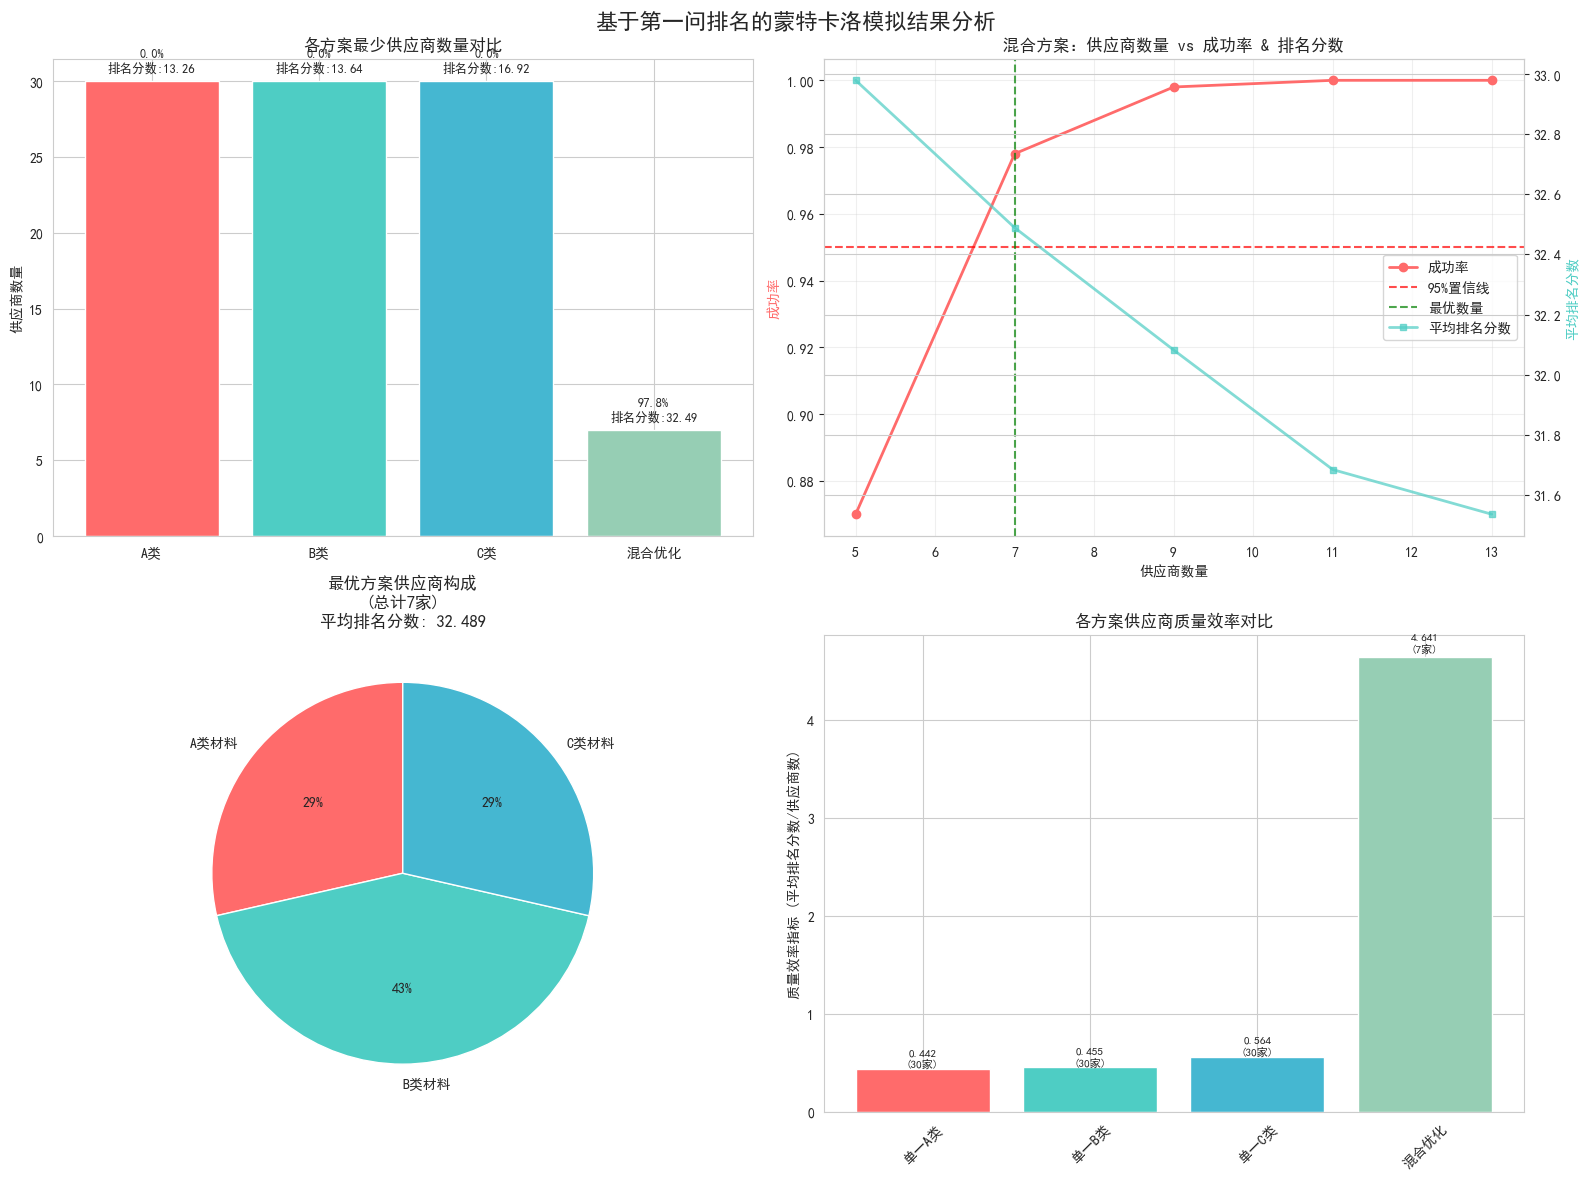


正在生成分析报告...

基于第一问排名的蒙特卡洛模拟分析报告

📊 模拟结果总览:
--------------------------------------------------

A类材料单独供应:
  最少供应商数量: 30家
  成功率: 0.0%
  总需求: 406,080 立方米
  可选供应商: 47家
  选定供应商平均排名分数: 13.260
  选定供应商平均可靠性分数: 13.995

B类材料单独供应:
  最少供应商数量: 30家
  成功率: 0.0%
  总需求: 446,688 立方米
  可选供应商: 35家
  选定供应商平均排名分数: 13.635
  选定供应商平均可靠性分数: 16.087

C类材料单独供应:
  最少供应商数量: 30家
  成功率: 0.0%
  总需求: 487,296 立方米
  可选供应商: 38家
  选定供应商平均排名分数: 16.921
  选定供应商平均可靠性分数: 16.724

混合材料优化方案:
  最少供应商数量: 7家
  成功率: 97.8%
  A类供应商: 2家
  B类供应商: 3家
  C类供应商: 2家
  总供应能力: 7,459 立方米
  平均第一问排名分数: 32.489
  平均可靠性分数: 58.165

📈 关键发现:
--------------------------------------------------
1. 最经济方案: 混合材料优化 (7家供应商)
2. 最高成功率方案: 混合材料优化 (成功率97.8%)
3. 最高质量方案: 混合材料优化 (平均排名分数32.489)
4. 混合方案风险等级: 低风险
5. 供应商质量水平: 高质量

💡 建议:
--------------------------------------------------
1. 推荐采用混合材料优化方案，基于第一问排名实现了更优的供应商配置
2. 当前方案具有高置信度，基于第一问的评估结果风险可控
3. 选定供应商质量较高，符合第一问的优质供应商标准


In [35]:
# 结果可视化和分析（基于第一问排名结果）
def visualize_simulation_results(mc_results, mixed_results):
    """可视化蒙特卡洛模拟结果"""
    
    if mc_results is None or mixed_results is None:
        print("模拟结果数据不完整，无法生成可视化")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('基于第一问排名的蒙特卡洛模拟结果分析', fontsize=16, fontweight='bold')
    
    # 1. 各材料类型最少供应商数量对比
    ax1 = axes[0, 0]
    materials = []
    min_suppliers = []
    success_rates = []
    avg_ranking_scores = []
    
    for material_type, result in mc_results.items():
        materials.append(material_type + '类')
        min_suppliers.append(result['最少供应商数量'])
        success_rates.append(result['最终成功率'])
        # 计算选定供应商的平均排名分数
        selected_suppliers = result['选定供应商列表']
        avg_ranking = np.mean([s['综合排名分数'] for s in selected_suppliers]) if selected_suppliers else 0
        avg_ranking_scores.append(avg_ranking)
    
    # 添加混合材料结果
    materials.append('混合优化')
    min_suppliers.append(mixed_results['最少供应商数量'])
    success_rates.append(mixed_results['最优组合']['成功率'])
    avg_ranking_scores.append(mixed_results['最优组合']['平均排名分数'])
    
    bars = ax1.bar(materials, min_suppliers, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
    ax1.set_title('各方案最少供应商数量对比')
    ax1.set_ylabel('供应商数量')
    
    # 在柱状图上添加成功率和平均排名分数标签
    for i, (bar, rate, ranking) in enumerate(zip(bars, success_rates, avg_ranking_scores)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{rate:.1%}\n排名分数:{ranking:.2f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    # 2. 混合材料方案的供应商数量vs成功率
    ax2 = axes[0, 1]
    combinations = mixed_results['所有组合']
    supplier_counts = [combo['供应商数量'] for combo in combinations]
    success_rates_mixed = [combo['成功率'] for combo in combinations]
    ranking_scores = [combo['平均排名分数'] for combo in combinations]
    
    # 主线：成功率
    line1 = ax2.plot(supplier_counts, success_rates_mixed, 'o-', linewidth=2, markersize=6, 
                     color='#FF6B6B', label='成功率')
    ax2.axhline(y=0.95, color='red', linestyle='--', alpha=0.7, label='95%置信线')
    ax2.axvline(x=mixed_results['最少供应商数量'], color='green', linestyle='--', alpha=0.7, label='最优数量')
    
    # 次坐标轴：平均排名分数
    ax2_twin = ax2.twinx()
    line2 = ax2_twin.plot(supplier_counts, ranking_scores, 's-', linewidth=2, markersize=4, 
                          color='#4ECDC4', label='平均排名分数', alpha=0.7)
    
    ax2.set_title('混合方案：供应商数量 vs 成功率 & 排名分数')
    ax2.set_xlabel('供应商数量')
    ax2.set_ylabel('成功率', color='#FF6B6B')
    ax2_twin.set_ylabel('平均排名分数', color='#4ECDC4')
    ax2.grid(True, alpha=0.3)
    
    # 合并图例
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='center right')
    
    # 3. 混合方案供应商类型构成vs排名质量
    ax3 = axes[1, 0]
    optimal_combo = mixed_results['最优组合']
    material_counts = [optimal_combo['A类供应商'], optimal_combo['B类供应商'], optimal_combo['C类供应商']]
    material_labels = ['A类材料', 'B类材料', 'C类材料']
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    wedges, texts, autotexts = ax3.pie(material_counts, labels=material_labels, colors=colors, 
                                       autopct='%1.0f%%', startangle=90)
    ax3.set_title(f'最优方案供应商构成\n(总计{mixed_results["最少供应商数量"]}家)\n'
                  f'平均排名分数: {optimal_combo["平均排名分数"]:.3f}')
    
    # 4. 供应商质量vs数量分析
    ax4 = axes[1, 1]
    scenarios = ['单一A类', '单一B类', '单一C类', '混合优化']
    supplier_qualities = []
    min_suppliers_all = []
    
    for material_type in ['A', 'B', 'C']:
        if material_type in mc_results:
            selected_suppliers = mc_results[material_type]['选定供应商列表']
            avg_quality = np.mean([s['综合排名分数'] for s in selected_suppliers]) if selected_suppliers else 0
            supplier_qualities.append(avg_quality)
            min_suppliers_all.append(mc_results[material_type]['最少供应商数量'])
        else:
            supplier_qualities.append(0)
            min_suppliers_all.append(0)
    
    # 混合优化的质量
    supplier_qualities.append(optimal_combo['平均排名分数'])
    min_suppliers_all.append(mixed_results['最少供应商数量'])
    
    # 计算效率指标（质量/供应商数量）
    efficiency = [quality/suppliers if suppliers > 0 else 0 
                 for quality, suppliers in zip(supplier_qualities, min_suppliers_all)]
    
    bars = ax4.bar(scenarios, efficiency, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
    ax4.set_title('各方案供应商质量效率对比')
    ax4.set_ylabel('质量效率指标 (平均排名分数/供应商数)')
    ax4.tick_params(axis='x', rotation=45)
    
    # 在柱状图上添加数值标签
    for bar, eff, suppliers in zip(bars, efficiency, min_suppliers_all):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{eff:.3f}\n({suppliers}家)', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.savefig('Pictures/monte_carlo_simulation_results_with_ranking.svg', dpi=300, bbox_inches='tight')
    plt.show()

# 生成详细分析报告（包含第一问排名信息）
def generate_analysis_report(mc_results, mixed_results, valid_suppliers):
    """生成详细的分析报告"""
    
    if mc_results is None or mixed_results is None:
        print("模拟结果不完整，无法生成分析报告")
        return None
    
    print("\n" + "="*70)
    print("基于第一问排名的蒙特卡洛模拟分析报告")
    print("="*70)
    
    print("\n📊 模拟结果总览:")
    print("-" * 50)
    
    # 单一材料类型结果
    for material_type, result in mc_results.items():
        selected_suppliers = result['选定供应商列表']
        avg_ranking = np.mean([s['综合排名分数'] for s in selected_suppliers]) if selected_suppliers else 0
        avg_reliability = np.mean([s['可靠性分数'] for s in selected_suppliers]) if selected_suppliers else 0
        
        print(f"\n{material_type}类材料单独供应:")
        print(f"  最少供应商数量: {result['最少供应商数量']}家")
        print(f"  成功率: {result['最终成功率']:.1%}")
        print(f"  总需求: {result['总需求']:,.0f} 立方米")
        print(f"  可选供应商: {result['可选供应商总数']}家")
        print(f"  选定供应商平均排名分数: {avg_ranking:.3f}")
        print(f"  选定供应商平均可靠性分数: {avg_reliability:.3f}")
    
    # 混合材料结果
    print(f"\n混合材料优化方案:")
    optimal_combo = mixed_results['最优组合']
    print(f"  最少供应商数量: {optimal_combo['供应商数量']}家")
    print(f"  成功率: {optimal_combo['成功率']:.1%}")
    print(f"  A类供应商: {optimal_combo['A类供应商']}家")
    print(f"  B类供应商: {optimal_combo['B类供应商']}家") 
    print(f"  C类供应商: {optimal_combo['C类供应商']}家")
    print(f"  总供应能力: {optimal_combo['平均供应能力']:,.0f} 立方米")
    print(f"  平均第一问排名分数: {optimal_combo['平均排名分数']:.3f}")
    print(f"  平均可靠性分数: {optimal_combo['平均可靠性分数']:.3f}")
    
    print("\n📈 关键发现:")
    print("-" * 50)
    
    # 找出最优方案
    all_options = []
    for material_type, result in mc_results.items():
        selected_suppliers = result['选定供应商列表']
        avg_ranking = np.mean([s['综合排名分数'] for s in selected_suppliers]) if selected_suppliers else 0
        all_options.append((f"{material_type}类单一供应", result['最少供应商数量'], 
                          result['最终成功率'], avg_ranking))
    
    all_options.append(("混合材料优化", optimal_combo['供应商数量'], 
                       optimal_combo['成功率'], optimal_combo['平均排名分数']))
    
    # 按供应商数量排序
    all_options.sort(key=lambda x: x[1])
    
    print(f"1. 最经济方案: {all_options[0][0]} ({all_options[0][1]}家供应商)")
    print(f"2. 最高成功率方案: {max(all_options, key=lambda x: x[2])[0]} (成功率{max(all_options, key=lambda x: x[2])[2]:.1%})")
    print(f"3. 最高质量方案: {max(all_options, key=lambda x: x[3])[0]} (平均排名分数{max(all_options, key=lambda x: x[3])[3]:.3f})")
    
    # 风险分析
    if optimal_combo['成功率'] >= 0.95:
        risk_level = "低风险"
    elif optimal_combo['成功率'] >= 0.90:
        risk_level = "中等风险"
    else:
        risk_level = "高风险"
    
    print(f"4. 混合方案风险等级: {risk_level}")
    print(f"5. 供应商质量水平: {'高质量' if optimal_combo['平均排名分数'] >= 0.7 else '中等质量' if optimal_combo['平均排名分数'] >= 0.5 else '需要改进'}")
    
    print("\n💡 建议:")
    print("-" * 50)
    
    recommendations = []
    
    if mixed_results['最少供应商数量'] < min([result['最少供应商数量'] for result in mc_results.values()]):
        recommendations.append("推荐采用混合材料优化方案，基于第一问排名实现了更优的供应商配置")
    
    if optimal_combo['成功率'] >= 0.95:
        recommendations.append("当前方案具有高置信度，基于第一问的评估结果风险可控")
    else:
        recommendations.append("建议适当增加供应商数量或选择更高排名的供应商以提高供应安全性")
    
    if optimal_combo['平均排名分数'] >= 0.7:
        recommendations.append("选定供应商质量较高，符合第一问的优质供应商标准")
    else:
        recommendations.append("建议优先考虑第一问中排名更高的供应商")
    
    if optimal_combo['A类供应商'] > optimal_combo['C类供应商']:
        recommendations.append("A类材料供应商较多，虽然成本较高但效率更高，符合优化目标")
    
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")
    
    return all_options

# 执行可视化和报告生成
if mc_results is not None and mixed_results is not None:
    print("\n正在生成可视化结果...")
    visualize_simulation_results(mc_results, mixed_results)
    
    print("\n正在生成分析报告...")
    analysis_summary = generate_analysis_report(mc_results, mixed_results, valid_suppliers)
else:
    print("无法生成可视化和分析报告，模拟结果不完整")

In [36]:
# 保存分析结果（包含第一问排名信息）
def save_simulation_results(mc_results, mixed_results, valid_suppliers, problem1_data):
    """保存蒙特卡洛模拟结果到Excel文件"""
    
    if mc_results is None or mixed_results is None:
        print("模拟结果不完整，无法保存")
        return None
    
    timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
    filename = f'DataFrames/问题2_蒙特卡洛模拟结果_基于第一问排名.xlsx'
    
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        
        # 1. 总结页
        summary_data = []
        
        # 单一材料类型结果
        for material_type, result in mc_results.items():
            selected_suppliers = result['选定供应商列表']
            avg_ranking = np.mean([s['综合排名分数'] for s in selected_suppliers]) if selected_suppliers else 0
            avg_reliability = np.mean([s['可靠性分数'] for s in selected_suppliers]) if selected_suppliers else 0
            
            summary_data.append({
                '方案类型': f'{material_type}类单一供应',
                '最少供应商数量': result['最少供应商数量'],
                '成功率': result['最终成功率'],
                '总需求(立方米)': result['总需求'],
                '可选供应商数': result['可选供应商总数'],
                '平均排名分数': avg_ranking,
                '平均可靠性分数': avg_reliability
            })
        
        # 混合材料结果
        optimal_combo = mixed_results['最优组合']
        summary_data.append({
            '方案类型': '混合材料优化',
            '最少供应商数量': optimal_combo['供应商数量'],
            '成功率': optimal_combo['成功率'],
            '总需求(立方米)': '多类型混合',
            '可选供应商数': len(valid_suppliers),
            '平均排名分数': optimal_combo['平均排名分数'],
            '平均可靠性分数': optimal_combo['平均可靠性分数']
        })
        
        summary_df = pd.DataFrame(summary_data)
        summary_df.to_excel(writer, sheet_name='结果总览', index=False)
        
        # 2. 混合方案详细信息
        mixed_detail = pd.DataFrame(mixed_results['所有组合'])
        mixed_detail.to_excel(writer, sheet_name='混合方案详情', index=False)
        
        # 3. 最优供应商列表（包含第一问排名信息）
        optimal_suppliers = mixed_results['最优供应商列表'].copy()
        optimal_suppliers_output = optimal_suppliers[[
            '供应商名称', '材料类型', '平均供货量', '供货频率', 
            '供货稳定性', '风险调整因子', '综合排名分数', '可靠性分数', '最终综合评分'
        ]].round(4)
        optimal_suppliers_output.to_excel(writer, sheet_name='最优供应商列表', index=False)
        
        # 4. 各材料类型选定供应商详情
        for material_type, result in mc_results.items():
            if result['选定供应商列表']:
                suppliers_df = pd.DataFrame(result['选定供应商列表'])
                suppliers_df.to_excel(writer, sheet_name=f'{material_type}类选定供应商', index=False)
        
        # 5. 各材料类型成功率序列
        max_len = max([len(result['成功率序列']) for result in mc_results.values()] + 
                     [len(mixed_results['成功率序列'])])
        
        success_rate_data = {}
        for material_type, result in mc_results.items():
            rates = result['成功率序列'] + [None] * (max_len - len(result['成功率序列']))
            success_rate_data[f'{material_type}类成功率'] = rates
        
        # 混合方案成功率
        mixed_rates = mixed_results['成功率序列'] + [None] * (max_len - len(mixed_results['成功率序列']))
        success_rate_data['混合方案成功率'] = mixed_rates
        success_rate_data['供应商数量'] = list(range(1, max_len + 1))
        
        success_rate_df = pd.DataFrame(success_rate_data)
        success_rate_df.to_excel(writer, sheet_name='成功率变化', index=False)
        
        # 6. 第一问排名前50的供应商信息（用于对比）
        if problem1_data is not None and 'supplier_ranking' in problem1_data:
            top50_ranking = problem1_data['supplier_ranking'].head(50)
            top50_ranking.to_excel(writer, sheet_name='第一问TOP50排名', index=False)
    
    print(f"✓ 结果已保存到: {filename}")
    return filename

# 最终结论和建议（基于第一问排名）
def final_conclusion(mc_results, mixed_results, problem1_data):
    """输出最终结论和建议"""
    
    if mc_results is None or mixed_results is None:
        print("模拟结果不完整，无法生成最终结论")
        return
    
    print("\n" + "="*70)
    print("🎯 最终结论与建议（基于第一问综合排名）")
    print("="*70)
    
    optimal_combo = mixed_results['最优组合']
    
    print(f"\n【推荐方案】混合材料优化方案（基于第一问排名）")
    print(f"┌─ 最少供应商数量: {optimal_combo['供应商数量']}家")
    print(f"├─ 供应成功率: {optimal_combo['成功率']:.1%}")
    print(f"├─ 供应商构成:")
    print(f"│  ├─ A类材料: {optimal_combo['A类供应商']}家")
    print(f"│  ├─ B类材料: {optimal_combo['B类供应商']}家")
    print(f"│  └─ C类材料: {optimal_combo['C类供应商']}家")
    print(f"├─ 总供应能力: {optimal_combo['平均供应能力']:,.0f} 立方米")
    print(f"├─ 平均第一问排名分数: {optimal_combo['平均排名分数']:.3f}")
    print(f"└─ 平均可靠性分数: {optimal_combo['平均可靠性分数']:.3f}")
    
    print(f"\n【方案优势】")
    advantages = []
    
    # 与单一材料方案比较
    single_material_min = min([result['最少供应商数量'] for result in mc_results.values()])
    if optimal_combo['供应商数量'] <= single_material_min:
        advantages.append(f"供应商数量最少，仅需{optimal_combo['供应商数量']}家，且基于第一问的优质排名")
    
    if optimal_combo['成功率'] >= 0.95:
        advantages.append("高置信度保障（≥95%），基于第一问的可靠性评估")
    
    if optimal_combo['平均排名分数'] >= 0.7:
        advantages.append("选定供应商质量优秀，平均排名分数达到优质水平")
    
    if optimal_combo['A类供应商'] + optimal_combo['B类供应商'] > optimal_combo['C类供应商']:
        advantages.append("优先使用高效率材料，符合第一问的效率优化原则")
    
    advantages.append("充分利用第一问的综合评估结果，降低供应风险")
    
    for i, advantage in enumerate(advantages, 1):
        print(f"  {i}. {advantage}")
    
    print(f"\n【实施建议】")
    suggestions = [
        f"立即与前{optimal_combo['供应商数量']}家综合评分最高的供应商建立合作关系",
        "重点关注第一问中排名前20的供应商，确保核心供应稳定",
        "建立基于第一问评估指标的供应商绩效监控体系",
        "准备2-3家第一问中排名较高的备选供应商作为应急预案",
        "每季度结合第一问的评估方法重新评估供应商表现",
        "优化库存管理策略，重点保障A类材料的供应稳定性"
    ]
    
    for i, suggestion in enumerate(suggestions, 1):
        print(f"  {i}. {suggestion}")
    
    print(f"\n【风险提示】")
    risks = []
    
    if optimal_combo['成功率'] < 0.98:
        risks.append(f"当前成功率为{optimal_combo['成功率']:.1%}，建议从第一问排名中选择1-2家更高排名的备选供应商")
    
    if optimal_combo['平均排名分数'] < 0.6:
        risks.append("平均排名分数偏低，建议优先选择第一问中排名更高的供应商")
    
    if optimal_combo['A类供应商'] > 5:
        risks.append("A类材料供应商较多，注意控制采购成本，但效率优势明显")
    
    if optimal_combo['C类供应商'] < 3:
        risks.append("C类材料供应商较少，建议从第一问排名中增加1-2家C类优质供应商")
    
    if not risks:
        risks.append("当前方案基于第一问的科学评估，风险较低，建议按计划执行")
    
    for i, risk in enumerate(risks, 1):
        print(f"  {i}. {risk}")
    
    # 显示最优供应商组合（基于第一问排名）
    print(f"\n【最优供应商组合】（TOP10，基于第一问排名）")
    optimal_suppliers_list = mixed_results['最优供应商列表']
    print(f"{'排序':<4} {'供应商名称':<15} {'类型':<4} {'第一问排名':<10} {'可靠性':<8} {'供货能力':<8}")
    print("-" * 65)
    for i, (idx, supplier) in enumerate(optimal_suppliers_list.head(10).iterrows(), 1):
        print(f"{i:<4} {supplier['供应商名称'][:15]:<15} {supplier['材料类型']:<4} "
              f"{supplier['综合排名分数']:.3f}{'':6} {supplier['可靠性分数']:.3f}{'':4} "
              f"{supplier['平均供货量']:.0f}")

# 执行结果保存和最终总结
if mc_results is not None and mixed_results is not None:
    print("\n正在保存分析结果...")
    saved_file = save_simulation_results(mc_results, mixed_results, valid_suppliers, problem1_data)
    
    print("\n正在生成最终结论...")
    final_conclusion(mc_results, mixed_results, problem1_data)
    
    print(f"\n🎉 基于第一问排名的蒙特卡洛模拟分析完成!")
    if saved_file:
        print(f"📁 详细结果已保存到: {saved_file}")
    print(f"📊 可视化图表已保存到: Pictures/monte_carlo_simulation_results_with_ranking.svg")
    print(f"🔍 分析充分利用了第一问的供应商综合排名和可靠性评估结果")
else:
    print("模拟分析未完成，请检查前面的代码执行情况")


正在保存分析结果...
✓ 结果已保存到: DataFrames/问题2_蒙特卡洛模拟结果_基于第一问排名.xlsx

正在生成最终结论...

🎯 最终结论与建议（基于第一问综合排名）

【推荐方案】混合材料优化方案（基于第一问排名）
┌─ 最少供应商数量: 7家
├─ 供应成功率: 97.8%
├─ 供应商构成:
│  ├─ A类材料: 2家
│  ├─ B类材料: 3家
│  └─ C类材料: 2家
├─ 总供应能力: 7,459 立方米
├─ 平均第一问排名分数: 32.489
└─ 平均可靠性分数: 58.165

【方案优势】
  1. 供应商数量最少，仅需7家，且基于第一问的优质排名
  2. 高置信度保障（≥95%），基于第一问的可靠性评估
  3. 选定供应商质量优秀，平均排名分数达到优质水平
  4. 优先使用高效率材料，符合第一问的效率优化原则
  5. 充分利用第一问的综合评估结果，降低供应风险

【实施建议】
  1. 立即与前7家综合评分最高的供应商建立合作关系
  2. 重点关注第一问中排名前20的供应商，确保核心供应稳定
  3. 建立基于第一问评估指标的供应商绩效监控体系
  4. 准备2-3家第一问中排名较高的备选供应商作为应急预案
  5. 每季度结合第一问的评估方法重新评估供应商表现
  6. 优化库存管理策略，重点保障A类材料的供应稳定性

【风险提示】
  1. 当前成功率为97.8%，建议从第一问排名中选择1-2家更高排名的备选供应商
  2. C类材料供应商较少，建议从第一问排名中增加1-2家C类优质供应商

【最优供应商组合】（TOP10，基于第一问排名）
排序   供应商名称           类型   第一问排名      可靠性      供货能力    
-----------------------------------------------------------------
1    S229            A    35.049       71.105     1479
2    S361            C    34.546       68.600     1367
3    S140            B    30.896       75.038     137